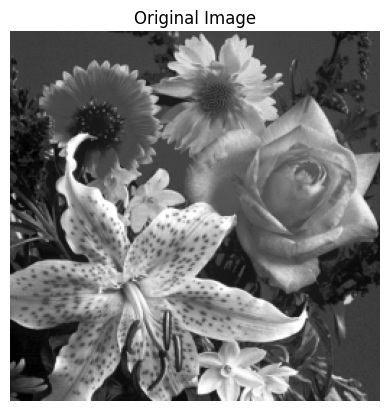

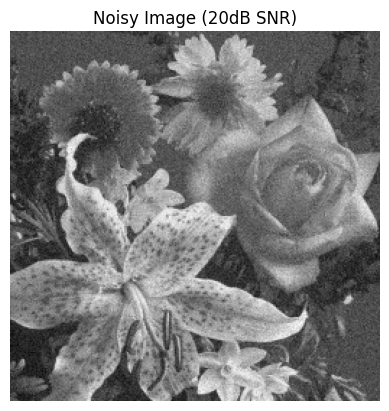

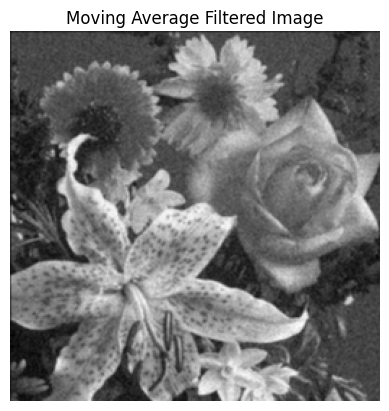

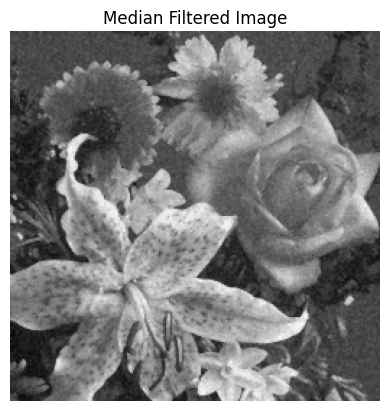

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter, median_filter
from scipy.io import loadmat

mat_data = loadmat(r'data\Lab1\task2\flower.mat')
image = mat_data['flower']


def add_gaussian_noise(image, snr_db):
    # Calculate the power of the signal
    signal_power = np.mean(image ** 2)
    
    # Calculate noise power for the desired SNR in dB
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    
    # Standard deviation of the Gaussian noise
    noise_std = np.sqrt(noise_power)
    
    # Generate Gaussian noise
    noise = np.random.normal(0, noise_std, image.shape)
    
    # Add the noise to the image
    noisy_image = image + noise
    
    return noisy_image

# Function to display images
def display_image(image, title, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Add Gaussian noise to achieve 20dB SNR
snr_db = 20
noisy_image = add_gaussian_noise(image, snr_db)

# Apply a moving average filter (uniform filter)
moving_average_filtered = uniform_filter(noisy_image, size=2,mode='constant')

# Apply a median filter
median_filtered = median_filter(noisy_image, size=2)


# Display the images
display_image(image, 'Original Image')
display_image(noisy_image, 'Noisy Image (20dB SNR)')
display_image(moving_average_filtered, 'Moving Average Filtered Image')
display_image(median_filtered, 'Median Filtered Image')


In [6]:
moving_average_filtered

array([[0.26586916, 0.27274024, 0.29008041, ..., 0.27424399, 0.26658649,
        0.24055209],
       [0.26524753, 0.27821876, 0.28043443, ..., 0.2666232 , 0.26519706,
        0.24444245],
       [0.28387421, 0.28509858, 0.263077  , ..., 0.2529227 , 0.25683703,
        0.24675248],
       ...,
       [0.23610653, 0.29262966, 0.29761331, ..., 0.26692301, 0.26099128,
        0.25528193],
       [0.27159531, 0.295906  , 0.29212272, ..., 0.25770551, 0.26991275,
        0.27235461],
       [0.29859823, 0.29924643, 0.3033762 , ..., 0.23836383, 0.27293465,
        0.2880556 ]])

In [7]:
image

array([[0.27058824, 0.2745098 , 0.27058824, ..., 0.28235294, 0.27843137,
        0.27843137],
       [0.2745098 , 0.2745098 , 0.27058824, ..., 0.28627451, 0.28627451,
        0.28235294],
       [0.2627451 , 0.27843137, 0.27058824, ..., 0.27843137, 0.2745098 ,
        0.27843137],
       ...,
       [0.28235294, 0.21960784, 0.21176471, ..., 0.27058824, 0.27843137,
        0.26666667],
       [0.29803922, 0.30588235, 0.30588235, ..., 0.26666667, 0.27058824,
        0.27058824],
       [0.30196078, 0.30980392, 0.30196078, ..., 0.26666667, 0.2745098 ,
        0.27843137]])